In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread('H:/archive/train/0/Training_3908.jpg')

In [3]:
img_array.shape

(48, 48, 3)

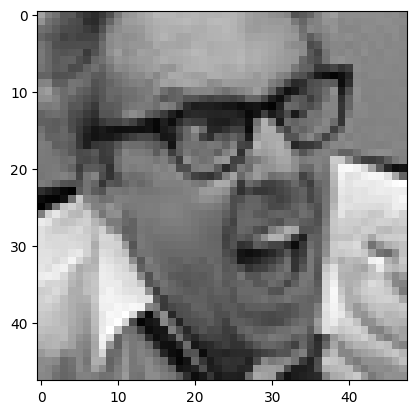

In [4]:
plt.imshow(img_array)

In [5]:
df_train = 'H:/archive/train/'

In [6]:
df_test= 'H:/archive/train/test/'

In [7]:
classes = ['0', '1', '2', '3', '4', '5', '6']

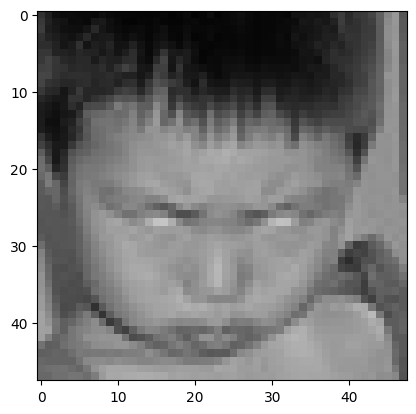

In [8]:
for category in classes:
    path = os.path.join(df_train, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

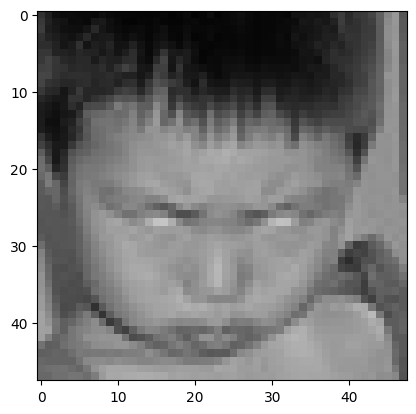

In [9]:
new_array = cv2.resize(img_array,(48,48))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))

In [10]:
plt.show()

In [11]:
#nkarnery vorpes tvel
training_data = []

def creating_train_data():
    for category in classes:
        path = os.path.join(df_train, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array,(48, 48))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [12]:
creating_train_data()
len(training_data)

28709

In [13]:
import random
random.shuffle(training_data)

In [14]:
X = []
y = []

for features, lable in training_data:
    X.append(cv2.cvtColor(features, cv2.COLOR_BGR2GRAY))
    y.append(lable)

X = np.array(X).reshape(-1, 48,48,1)

X = X/255.0

In [15]:
from keras.utils import to_categorical

In [16]:
y = to_categorical(y)

In [17]:
type(X)

numpy.ndarray

In [18]:
type(y)

numpy.ndarray

In [19]:
X.shape

(28709, 48, 48, 1)

In [20]:
y.shape

(28709, 7)

In [21]:
#!pip install keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [23]:
model = Sequential()
model.add(Conv2D(32, padding='valid', strides=1, kernel_size=(3, 3), input_shape=(48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  
model.add(Dropout(0.25))

model.add(Conv2D(64, padding='valid', strides=1, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) 
model.add(Dropout(0.25))

model.add(Conv2D(128, padding='valid', strides=1, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  
# model.add(Conv2D(128, padding='valid', strides=1, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) 
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

C:\Users\Artur\Desktop\cam\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,198,023 (8.38 MB)

 Trainable params: 2,198,023 (8.38 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X,y.reshape(28709, 7, 1), epochs= 15)

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 238s 265ms/step - accuracy: 0.1206 - loss: 0.3434
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 241s 269ms/step - accuracy: 0.1170 - loss: 0.3544
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 241s 268ms/step - accuracy: 0.1218 - loss: 0.3426
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 259s 265ms/step - accuracy: 0.1186 - loss: 0.3506
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 243s 270ms/step - accuracy: 0.1198 - loss: 0.3382
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 261s 269ms/step - accuracy: 0.1149 - loss: 0.3386
Epoch 7/15
490/898 ━━━━━━━━━━━━━━━━━━━━ 2:10 320ms/step - accuracy: 0.1217 - loss: 0.3216

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
model.save('Emotion_model.h5')
new_model = tf.keras.models.load_model('Emotion_model.h5')